# Random Clifford Circuit Code

While doing this PR, I noticed that there is a notebook deomstrating codes from 1D local random Clifford circuit: [Stabilizer_Codes_Based_on_Random_Circuits.ipynb](https://github.com/QuantumSavory/QuantumClifford.jl/blob/5c73f403f9f1c9183574e92bded2eb518f954d2a/docs/src/notebooks/Stabilizer_Codes_Based_on_Random_Circuits.ipynb).

What is new here:

1. Use sparse gates that should improve efficiency.
2. Use circuit of `AbstractOperation` to improve readability.
3. Add all-to-all and multi-dimensioanl random Clifford circuits.

Use some old codes that construct (local) random circuits.

In [5]:
include("mipt.jl")

random_clifford_with_measurements (generic function with 1 method)

In [6]:
apply_random_local_layers(random_stabilizer(10), 10)

- __XZZ___YZ
+ XX__XYYYYY
- _YZXZXXX_Z
+ _YZ_Z_Y__Y
+ ZYZZZZ_Y_Y
- ZZZ__YYXYX
+ X_XXXZYYXY
- YYXZXXZZ_X
+ YZZXX_XXZZ
- _XYZ_ZZXYX

The circuit can also be applied to some Paulis.

In [7]:
apply_random_local_layers(
    Stabilizer(vcat(random_pauli(10), random_pauli(10))), 10)

+ _XXYXYYX__
- XZZZ_X_Y_Z

What we still need to do:

- Change the implementation to be based on `AbstractOperation`, which is more readable. (And test.)
- Add random circuits that do not have locality.
- QECC construction.

## Circuit API

In [8]:
using Quantikz

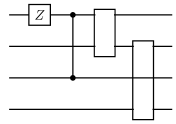

In [9]:
circ = QuantumClifford.AbstractOperation[]
push!(circ, sZ(1))
push!(circ, sZCZ(1,3))
push!(circ, SparseGate(random_clifford(2), [1, 2]))
push!(circ, SparseGate(random_clifford(2), [2, 4]))
displaycircuit(circ)

In [10]:
# using Random, Combinatorics

In [17]:
function random_all_to_all_clifford_circuit(nqubits, ngates)
    circ = QuantumClifford.AbstractOperation[]
    for i in 1:ngates
        j = rand(1:nqubits)
        k = rand(1:nqubits-1)
        push!(circ, SparseGate(random_clifford(2), [j, (j+k-1) % nqubits + 1]))
    end
    circ
end

random_all_to_all_clifford_circuit (generic function with 1 method)

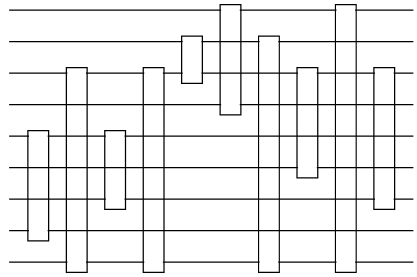

In [18]:
random_all_to_all_clifford_circuit(10, 10)

In [119]:
function random_local_clifford_circuit(l, dim, nlayers)
    circ = QuantumClifford.AbstractOperation[]
    cartesian = CartesianIndices(Tuple(repeat([l], dim)))
    nqubits = l^dim
    for i in 1:nlayers
        gate_direction = (i-1) % dim + 1
        brickwise_parity = (i ÷ dim) % 2
        for j in 1:nqubits
            cardj = collect(cartesian[j].I)
            if cardj[gate_direction] % 2 == brickwise_parity && cardj[gate_direction]!=nqubits
                cardk = cardj
                cardk[gate_direction] = cardk[gate_direction] % l + 1
                k = LinearIndices(cartesian)[cardk...]
                push!(circ, SparseGate(random_clifford(2), [j, k]))
            end
        end
    end
    circ
end

random_local_clifford_circuit (generic function with 1 method)

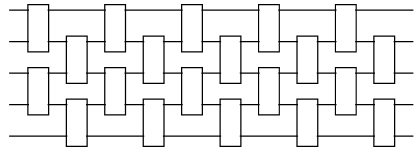

In [120]:
random_local_clifford_circuit(5, 1, 10)

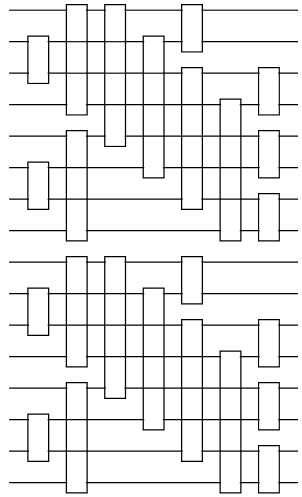

In [121]:
random_local_clifford_circuit(4, 2, 3)

In [54]:
# ?CartesianIndices

Here, we use the `CartesianIndices` for conversion between lattice indices and linear indices.

In [62]:
cartesian = CartesianIndices((4, 4, 4))
cartesian[17]

CartesianIndex(1, 1, 2)

In [63]:
cartesian[17].I

(1, 1, 2)

In [68]:
ii = [1,1,2]
LinearIndices(cartesian)[ii...]

17

In [154]:
LinearIndices(cartesian)

4×4×4 LinearIndices{3, Tuple{Base.OneTo{Int64}, Base.OneTo{Int64}, Base.OneTo{Int64}}}:
[:, :, 1] =
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16

[:, :, 2] =
 17  21  25  29
 18  22  26  30
 19  23  27  31
 20  24  28  32

[:, :, 3] =
 33  37  41  45
 34  38  42  46
 35  39  43  47
 36  40  44  48

[:, :, 4] =
 49  53  57  61
 50  54  58  62
 51  55  59  63
 52  56  60  64

In [57]:
# cartesian[:,1:2:end,:] .|> println

In [69]:
# CartesianIndices(repeat([2], 4))

In [122]:
# CartesianIndices((4, 4, 4))

## QECC

In [133]:
l = 10
dim = 1
n = l^dim
one(Stabilizer, n)

+ Z_________
+ _Z________
+ __Z_______
+ ___Z______
+ ____Z_____
+ _____Z____
+ ______Z___
+ _______Z__
+ ________Z_
+ _________Z

In [137]:
checks = one(Stabilizer, n)

for op in random_local_clifford_circuit(l, dim, 1)
    apply!(checks, op)
end

checks

- ZY________
- XX________
- __Z_______
+ __ZX______
+ ____ZY____
+ ____XX____
+ ______XY__
- ______ZZ__
+ ________YX
- _________X

In [135]:
checks = one(Stabilizer, n)

for op in random_local_clifford_circuit(l, dim, 10)
    apply!(checks, op)
end

checks

+ XXYZYYY___
+ Z_ZXX_____
+ YXYYZ_XYZ_
- ZX_YZXYYZ_
- _ZZZY_Y_XZ
+ _ZZ_X_X_XZ
+ Z_X_YZXX_Z
- _______XXZ
+ Z_X_YYYZXY
- Z_XYX__YYZ

nqubits (generic function with 9 methods)